In [1]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 1.12.1


In [2]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [4]:
t_ones = torch.ones(2, 3)
print(t_ones)
t_ones.shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Size([2, 3])

In [5]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6870, 0.9686, 0.2272],
        [0.6309, 0.9529, 0.8837]])


In [6]:
#Manipulating the data type and shape of a tensor

In [7]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [8]:
#transpose
t = torch.rand(3, 5)
print(t)
t_tr = torch.transpose(t, 0, 1)
print(t_tr)
print(t.shape, ' --> ', t_tr.shape)

tensor([[0.8121, 0.3646, 0.8680, 0.9549, 0.9884],
        [0.4001, 0.9188, 0.3334, 0.0589, 0.6581],
        [0.9374, 0.9949, 0.9272, 0.4485, 0.7311]])
tensor([[0.8121, 0.4001, 0.9374],
        [0.3646, 0.9188, 0.9949],
        [0.8680, 0.3334, 0.9272],
        [0.9549, 0.0589, 0.4485],
        [0.9884, 0.6581, 0.7311]])
torch.Size([3, 5])  -->  torch.Size([5, 3])


In [9]:
#reshape
t = torch.zeros(30)
print(t)
t_reshape = t.reshape(5, 6)
print(t_reshape)
print(t_reshape.shape)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
torch.Size([5, 6])


In [10]:
#squeeze
t = torch.zeros(1, 2, 1, 4, 1)
print(t)
t_sqz = torch.squeeze(t, 2)
print(t_sqz)
print(t.shape, ' --> ', t_sqz.shape)

tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


In [11]:
#Applying mathematical operations to tensors

In [12]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1 
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(f"t1 = {t1}")
print(f"t2 = {t2}")

t1 = tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
t2 = tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [13]:
#elementwise multiplication
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [14]:
#mean through columns
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [15]:
#mean through rows
t4 = torch.mean(t1, axis=1)
print(t4)

tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [16]:
#matrix multiplication
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [17]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [18]:
#L2 norm
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [19]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

In [20]:
#Split, stack, and concatenate tensors

In [21]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [22]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[4, 1])
 
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403, 0.735], dtype=float32),
 array([0.029], dtype=float32)]

In [23]:
A = torch.ones(3)
B = torch.zeros(2)
print(f"A = {A} and B = {B}")
C = torch.cat([A, B], axis=0)
print(C)

A = tensor([1., 1., 1.]) and B = tensor([0., 0.])
tensor([1., 1., 1., 0., 0.])


In [24]:
A = torch.ones(3)
B = torch.zeros(3)
print(f"A = {A} and B = {B}")
S = torch.stack([A, B], axis=1)
print(S)

A = tensor([1., 1., 1.]) and B = tensor([0., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [25]:
#Building input pipelines in PyTorch
#Creating a PyTorch dataloader from existing tensors

In [26]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
print(t)
#data_loader = DataLoader(t)

tensor([0., 1., 2., 3., 4., 5.])


In [27]:
data_loader = DataLoader(t)

In [28]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [29]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [30]:
data_loader = DataLoader(t, batch_size=2, drop_last=False) #drop last argument is useful when the number of elements in the tensor is not divisible by the desired batch size

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1.])
batch 2: tensor([2., 3.])
batch 3: tensor([4., 5.])


In [31]:
#combining two tensors in a joint dataset (eg combining a feature tensor and a label tensor, and they will be retrived together as a tuple)

In [32]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
print(t_x)
t_y = torch.arange(4)
print(t_y)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])


In [33]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [34]:
joint_dataset = JointDataset(t_x, t_y)
print(joint_dataset)
joint_dataset

In [35]:
joint_dataset.__len__()

4

In [36]:
# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [ ]:
#shuffle, batch, and repeat 

In [38]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
#the rows are suffled without loosing the one-to-one correspondence

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


In [41]:
#when training a model for multiple epochs, we need to shuffle and iterate over the dataset
by the desired number of epochs
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([1, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([0, 3])
epoch 2
batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([2, 3])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


In [42]:
#creating a dataset from files on your local storage disk 
#6 cats dataset

In [45]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


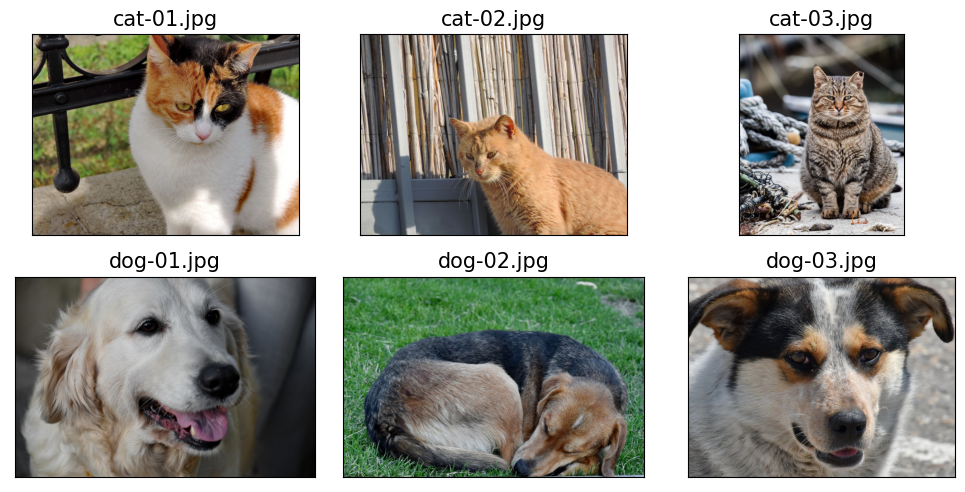

In [46]:
#Lets visualise these images with Mathplotlib
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [47]:
#1 is a doggy, 0 is a cat
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [48]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [49]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

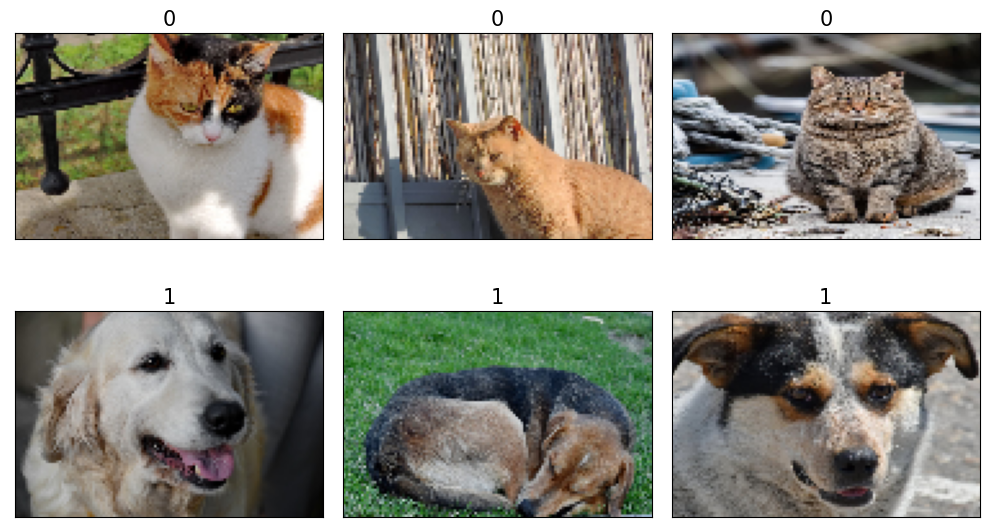

In [51]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
#plt.savefig('figures/12_04.pdf')
plt.show()

In [52]:
#Fetching available datasets from the torchvision.datasets library
import torchvision
#
from itertools import islice 

In [ ]:
#itt hianyzik a celeba resz, erre meg ra kell jonnom, hogy hogy kell 

In [ ]:
#fetching MNIST dataset
image_path = './'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
#plt.show()